In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Preprocessing and EDA

In [3]:
# Checking the columns' dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# Checking tha statistical summaries of numerical columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# Identifying null values.Null values can result into bad performance of the model
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Checking if their exist two or more rows with similar data
# These can have a negative impact on the model performance
df.duplicated().sum()

0

<Axes: xlabel='isFraud', ylabel='count'>

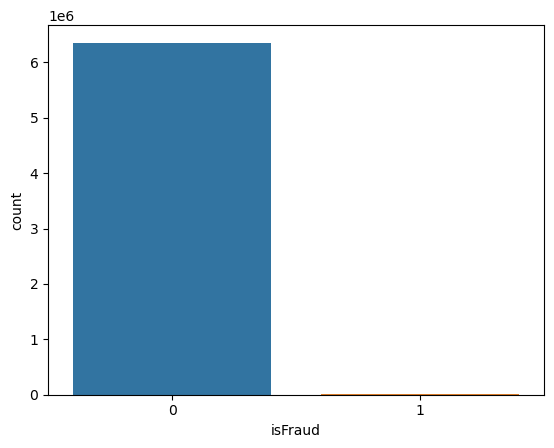

In [7]:
# Let's do some categorical plotting on the target variable 'fraud'
# We can see that most of the transactions are not Fraud
# The data may be imbalance,and we must take care of that
sns.countplot(x = df['isFraud'])

In [8]:
# changing the values of the column 'type' for readability
def clean(x):
    if x == 'CASH_OUT':
        return 'Cash Out'
    if x == 'PAYMENT':
        return 'Payment'
    if x == 'CASH_IN':
        return 'Cash In'
    if  x == 'TRANSFER':
        return 'Transfer'
    if x == 'DEBIT':
        return 'Debit'
    
df['type'] = df['type'].apply(clean)

In [9]:
df['type'].value_counts()

Cash Out    2237500
Payment     2151495
Cash In     1399284
Transfer     532909
Debit         41432
Name: type, dtype: int64

In [10]:
# Converting categorical to numerical since Ml algorithmns only work with numbers
df['type'] = df['type'].map({'Cash Out':4,'Payment':3,'Cash In':2,'Transfer':1,'Debit':0})

<Axes: xlabel='type', ylabel='count'>

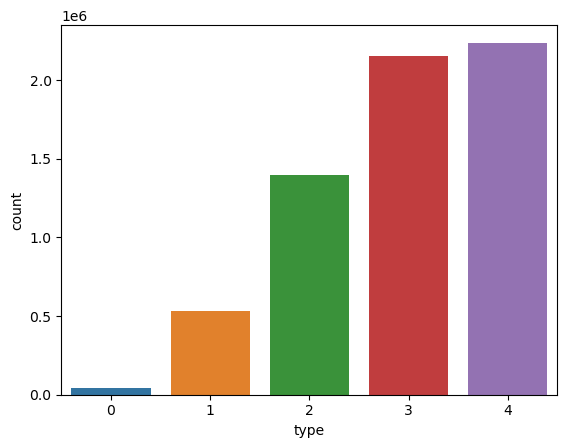

In [11]:
sns.countplot(x = df['type'])
# We can see that most of the transaction made are cash out
# and the least of them is through debit

## Checking distributions of numerical cols. ,it seems the have same distributions

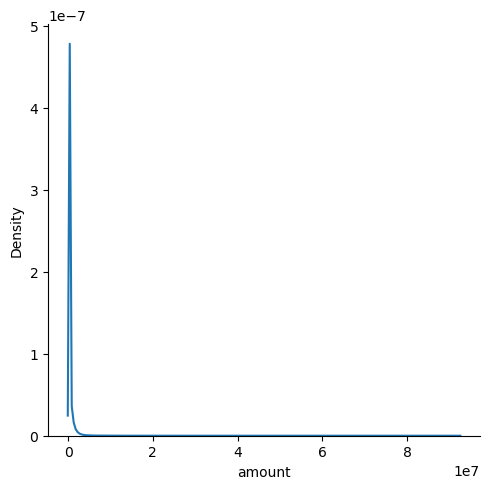

In [12]:
sns.displot(x = df['amount'],kind='kde')

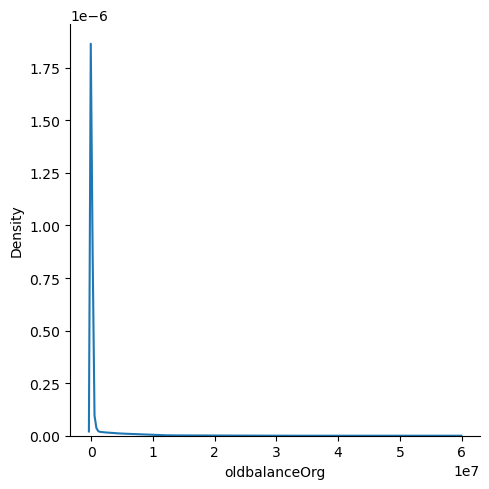

In [13]:
sns.displot(x=df['oldbalanceOrg'],kind = 'kde')

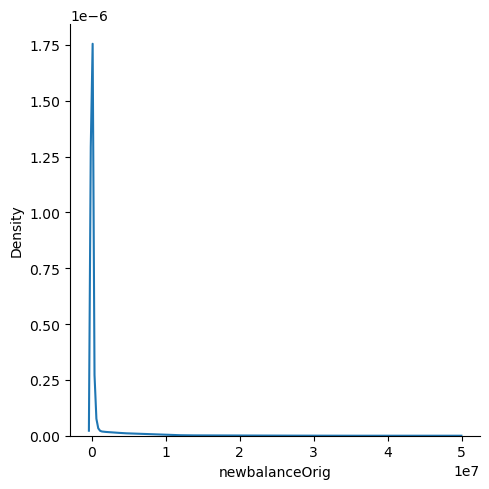

In [14]:
sns.displot(x=df['newbalanceOrig'],kind = 'kde')

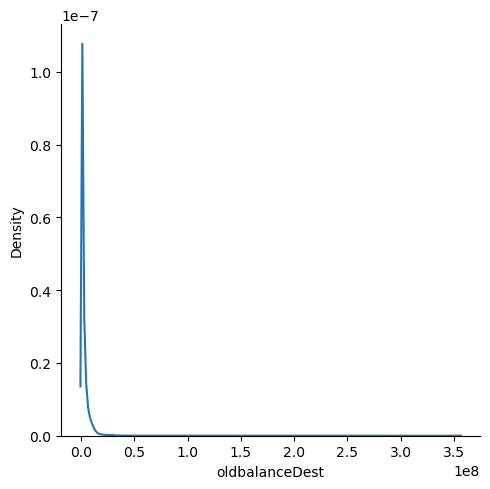

In [15]:
sns.displot(x=df['oldbalanceDest'],kind = 'kde')

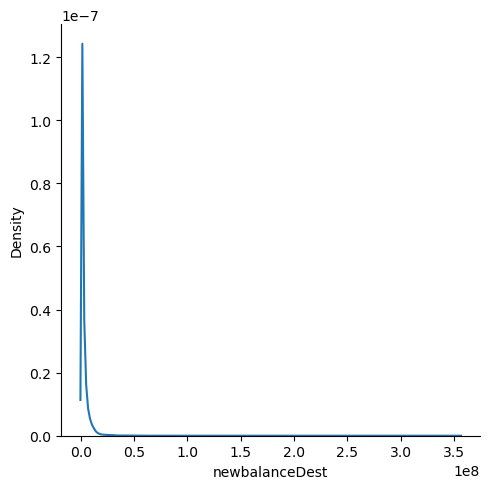

In [16]:
sns.displot(x=df['newbalanceDest'],kind = 'kde')

In [17]:
#performing undersampling of majority class in order to solve the imbalance problem
class_count_0,class_count_1 = df['isFraud'].value_counts()
class_0 = df[df['isFraud']==0]
class_1 = df[df['isFraud']==1]
print(f'Shape of class 0 before sampling is: {class_0.shape}')
print(f'Shape of class 1 before sampling is: {class_1.shape}')
class_0_under = class_0.sample(class_count_1)
df_under = pd.concat([class_0_under,class_1],axis=0)
print(f'Shape of class 0 after sampling is: {class_0_under.shape}')
print(f'Shape of class 1 after sampling is: {class_1.shape}')


Shape of class 0 before sampling is: (6354407, 11)
Shape of class 1 before sampling is: (8213, 11)
Shape of class 0 after sampling is: (8213, 11)
Shape of class 1 after sampling is: (8213, 11)


<Axes: xlabel='isFraud', ylabel='count'>

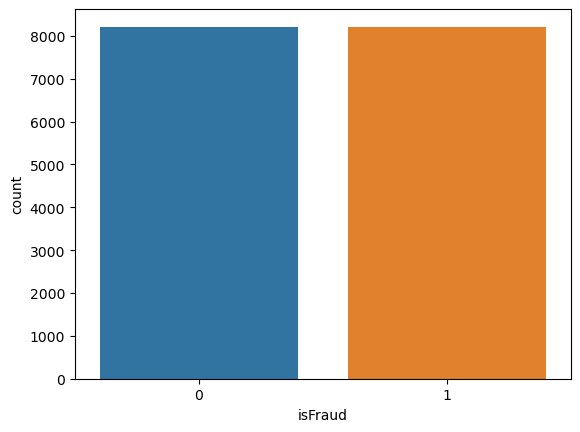

In [18]:
sns.countplot(x = df_under['isFraud'])

In [19]:
df_under['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [20]:
#checking the shape of the new dataframe after undersampling
df_under.shape

(16426, 11)

In [21]:
df_under.drop(['nameOrig','nameDest','isFlaggedFraud'],axis =1,inplace=True)

In [22]:
df_under.tail(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362610,742,1,63416.99,63416.99,0.0,0.00,0.00,1
6362611,742,4,63416.99,63416.99,0.0,276433.18,339850.17,1
6362612,743,1,1258818.82,1258818.82,0.0,0.00,0.00,1
6362613,743,4,1258818.82,1258818.82,0.0,503464.50,1762283.33,1
6362614,743,1,339682.13,339682.13,0.0,0.00,0.00,1
6362615,743,4,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,1,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,4,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00,1
6362619,743,4,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [23]:
df_under = df_under.sample(frac = 1)

In [24]:
df_under.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2947944,230,3,22266.32,0.00,0.0,0.00,0.00,0
2370765,191,4,2815.61,2815.61,0.0,64348.28,67163.90,1
1059705,118,4,897427.17,897427.17,0.0,75092.82,972520.00,1
3609350,265,4,881187.51,881187.51,0.0,35321.01,916508.52,1
2295108,187,3,174.80,0.00,0.0,0.00,0.00,0


In [25]:
df_under = df_under.reset_index(drop=True)

In [26]:
df_under

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,400,4,436757.76,436757.76,0.00,0.00,436757.76,1
1,284,4,110986.12,1206.00,0.00,288393.99,399380.11,0
2,186,2,28507.27,19334.00,47841.27,89415.76,60908.49,0
3,282,3,5069.34,90173.00,85103.66,0.00,0.00,0
4,170,4,335859.86,335859.86,0.00,0.00,335859.86,1
...,...,...,...,...,...,...,...,...
16421,230,3,22266.32,0.00,0.00,0.00,0.00,0
16422,191,4,2815.61,2815.61,0.00,64348.28,67163.90,1
16423,118,4,897427.17,897427.17,0.00,75092.82,972520.00,1
16424,265,4,881187.51,881187.51,0.00,35321.01,916508.52,1


<Axes: >

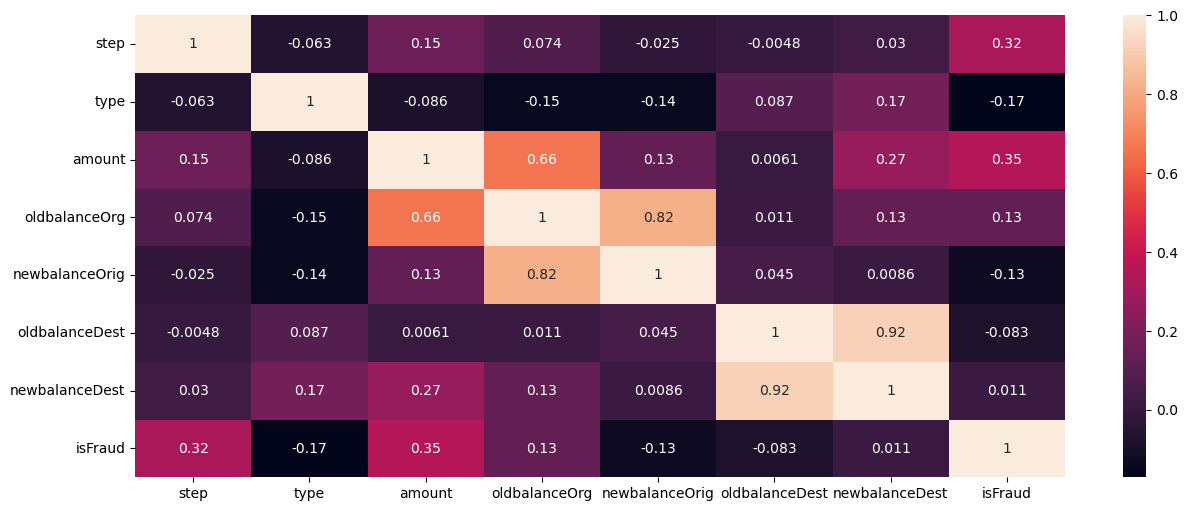

In [27]:
#checking the columns that are correlated with the target
plt.figure(figsize=(15,6))
sns.heatmap(df_under.corr(),annot = True)

In [28]:
# creating dependent and independent variables
X = df_under.drop('isFraud',axis = 1)
y = df_under['isFraud']

In [29]:
y

0        1
1        0
2        0
3        0
4        1
        ..
16421    0
16422    1
16423    1
16424    1
16425    0
Name: isFraud, Length: 16426, dtype: int64

In [30]:
# importing some useful scikit-learn libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
#splitting the dataset for training and testing the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
#scaling the data with MinMaxScaler since we saw earlier that our columns does not follow a normal distributuion
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# performing model hypaparameter tuning
# i choose to perform between two Ml algorithms
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,30,50,80,100],
            'criterion':['gini','entropy'],
            'max_depth':[2,4,6],
            'max_features':['sqrt','log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1,0.01,0.001],
            'max_depth':[3,5,10,20],
            'n_estimators':[10,20,50,80,100]
        }
    }
}

In [34]:
scores = []
for model_name,mp in model_param.items():
    selec = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=True)
    selec.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':selec.best_score_,
        'best_param':selec.best_params_
    })

In [35]:
#xgbclassifier has the best score
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9729683734860348,
  'best_param': {'criterion': 'gini',
   'max_depth': 6,
   'max_features': 'sqrt',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9925318084270582,
  'best_param': {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}}]

In [36]:
# model building and fitting
model = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators = 50)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
#making prediction and printing the accuracy
prediction = model.predict(X_test)
print(accuracy_score(y_test,prediction))

0.9934258582907232


In [38]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9934258582907232


In [39]:
model2 = RandomForestClassifier(criterion= 'entropy',max_depth= 6,max_features= 'log2',n_estimators= 10)
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       n_estimators=10)

In [40]:
prediction = model2.predict(X_test)
print(accuracy_score(y_test,prediction))

0.9646944241538836


In [41]:
inp = [1,'Transfer',181,181,0,0,0]
if inp[1] == 'Cash out':
    inp[1] = 4
if inp[1] == 'Payment':
    inp[1] = 3
if inp[1] == 'Cash in':
    inp[1] = 2
if inp[1] == 'Transfer':
    inp[1] = 1
if inp[1] == 'Debit':
    inp[1] = 0
    
print(inp)

[1, 1, 181, 181, 0, 0, 0]


In [42]:
inp = np.array(inp)
inp = inp.reshape(1,-1)

In [43]:
inp

array([[  1,   1, 181, 181,   0,   0,   0]])

In [44]:
model.predict(inp)

array([1])

In [45]:
model2.predict(inp)

array([1], dtype=int64)

In [46]:
import pickle
pickle.dump(model2,open('fraud.pkl','wb'))